# Problem Statement:

##### Predicting quality of wine based on quality category, citric acid quantity, chlorides density etc

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Part - 1 Data Exploration and Pre-processing

#### 1 - Loading the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Vyas\1_Assignment\ML FT Projects\SVM\P6_Wine_Quality_Analysis\Python_Project_6_SVM.csv")

#### 2 - Printing Information from the dataset

In [3]:
df.head()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Quality_Category    4894 non-null   int64  
 1   volatileacidity     4894 non-null   float64
 2   citricacid          4894 non-null   float64
 3   residualsugar       4894 non-null   float64
 4   chlorides           4894 non-null   float64
 5   freesulfurdioxide   4894 non-null   int64  
 6   totalsulfurdioxide  4894 non-null   int64  
 7   density             4894 non-null   float64
 8   sulphates           4894 non-null   float64
 9   alcohol             4894 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 382.5 KB


In [5]:
print("No. of Rows are: ", df.shape[0])
print("No. of Columns are: ", df.shape[1])

No. of Rows are:  4894
No. of Columns are:  10


#### 3 - Decribing the Dataset

In [6]:
df.describe()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000
mean,0.216387,0.278335,0.334146,6.391582,0.045773,35.311606,138.368615,0.994048,0.489904,10.514610
std,0.411823,0.100801,0.121047,5.071695,0.021855,17.019553,42.498278,0.003007,0.114153,1.230665
min,0.000000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987000,0.220000,8.000000
25%,0.000000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.992000,0.410000,9.500000
50%,0.000000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.994000,0.470000,10.400000
75%,0.000000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996000,0.550000,11.400000
max,1.000000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.039000,1.080000,14.200000


#### 4 - Printing the Column Names from the Dataset

In [7]:
df.columns

Index(['Quality_Category', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')

#### 5 - Countchart of Quality_Category

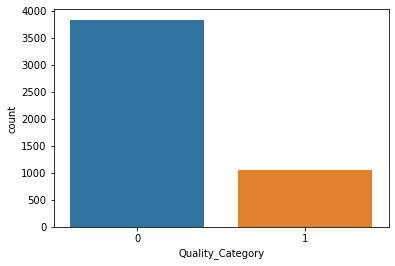

In [8]:
sns.countplot(x='Quality_Category', data=df);

#### 6 - Scatterplot of Volatile Acidity v/s Citric Acid

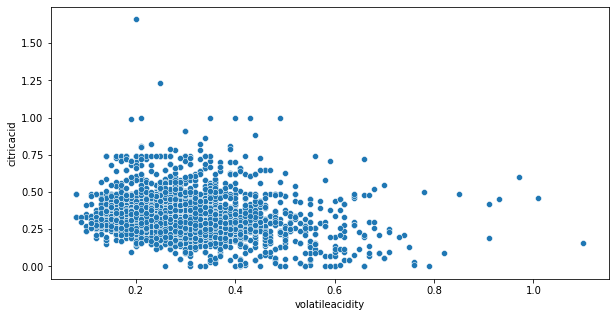

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='volatileacidity',y='citricacid',data=df);

#### 7 - Scatterplot of Residual Sugar vs Chlorides

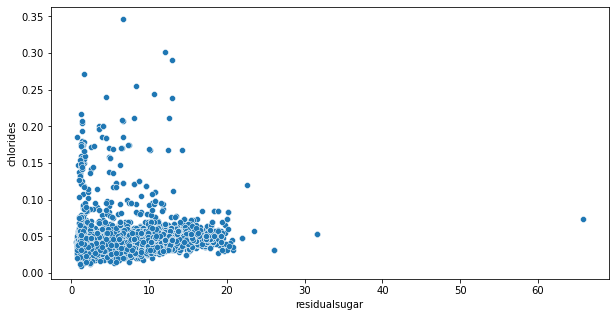

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='residualsugar',y='chlorides',data=df);

#### 8 - Scatterplot of Sulphates vs Alcohol

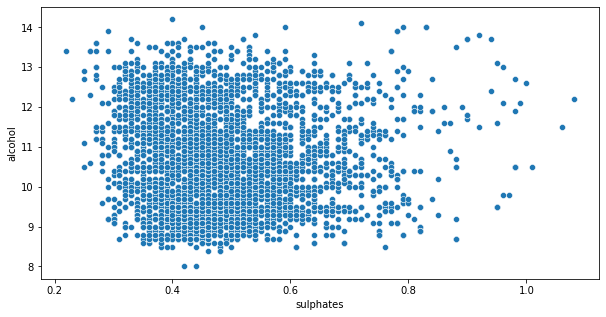

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='sulphates',y='alcohol',data=df);

#### 9 - Displaying Histplot of dataset

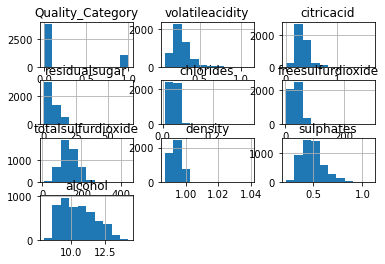

<Figure size 720x360 with 0 Axes>

In [12]:
df.hist()
plt.figure(figsize=(10,5))
plt.show()

#### 10 - Checking the null values

In [13]:
df.isnull().sum()

Quality_Category      0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
sulphates             0
alcohol               0
dtype: int64

#### Creating Target and Feature Data

In [14]:
X = df.drop('Quality_Category', axis=1)
y = df[['Quality_Category']]

## Part - 2 Working with the Model

#### 1 - Spliting into training and testing model

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

#### 2 - Applying Support Vector Machine

In [16]:
model = SVC()

In [17]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [18]:
pred = model.predict(X_test)

#### 3 - Checking the Training Score

In [19]:
model.score(X_train,y_train)

0.7849297573435504

#### 4 - Checking the Testing Score

In [20]:
model.score(X_test,y_test)

0.7783452502553626

#### 5 - Showing the Accuracy

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,pred)

0.7783452502553626

#### 6 - Creating the new model with different parameter

In [23]:
model1 = SVC(C=100)

In [24]:
model1.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100)

In [25]:
pred1 = model1.predict(X_test)

#### 7 - Checking the score of the new model

#### Training Score of the new Model

In [26]:
model1.score(X_train,y_train)

0.7849297573435504

#### Testing Score of the new Model

In [27]:
model1.score(X_test,y_test)

0.7783452502553626

#### Accuracy score of the new model

In [28]:
accuracy_score(y_test,pred1)

0.7783452502553626